# Zadanie domowe -- interpolacja dwusześcienna

Interpolacja dwusześcienna, to podobnie jak w przypadku interpolacji dwuliniowej, rozszerzenie idei interpolacji jednowymiarowej na dwuwymiarową siatkę.
W trakcie jej obliczania wykorzystywane jest 16 pikseli z otoczenia (dla dwuliniowej 4).
Skutkuje to zwykle lepszymi wynikami - obraz wyjściowy jest bardziej gładki i z mniejszą liczbą artefaktów.
Ceną jest znaczny wzrost złożoności obliczeniowej (zostało to zaobserwowane podczas ćwiczenia).

Interpolacja dana jest wzorem:
\begin{equation}
I(i,j) = \sum_{i=0}^{3} \sum_{j=0}^{3} a_{ij} x^i y^j
\end{equation}

Zadanie sprowadza się zatem do wyznaczenia 16 współczynników $a_{ij}$.
W tym celu wykorzystuje się, oprócz wartość w puntach $A$ (0,0), $B$ (1 0), $C$ (1,1), $D$ (0,1) (por. rysunek dotyczący interpolacji dwuliniowej), także pochodne cząstkowe $A_x$, $A_y$, $A_{xy}$.
Pozwala to rozwiązać układ 16-tu równań.

Jeśli zgrupujemy parametry $a_{ij}$:
\begin{equation}
a = [ a_{00}~a_{10}~a_{20}~a_{30}~a_{01}~a_{11}~a_{21}~a_{31}~a_{02}~a_{12}~a_{22}~a_{32}~a_{03}~a_{13}~a_{23}~a_{33}]
\end{equation}

i przyjmiemy:
\begin{equation}
x = [A~B~D~C~A_x~B_x~D_x~C_x~A_y~B_y~D_y~C_y~A_{xy}~B_{xy}~D_{xy}~C_{xy}]^T
\end{equation}

To zagadnienie można opisać w postaci równania liniowego:
\begin{equation}
Aa = x
\end{equation}
gdzie macierz $A^{-1}$ dana jest wzorem:

\begin{equation}
A^{-1} =
\begin{bmatrix}
1& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0& 0 \\
0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
-3&  3&  0&  0& -2& -1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
2& -2&  0&  0&  1&  1&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  0&  1&  0&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0& -3&  3&  0&  0& -2& -1&  0&  0 \\
0&  0&  0&  0&  0&  0&  0&  0&  2& -2&  0&  0&  1&  1&  0&  0 \\
-3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0& -3&  0&  3&  0&  0&  0&  0&  0& -2&  0& -1&  0 \\
9& -9& -9&  9&  6&  3& -6& -3&  6& -6&  3& -3&  4&  2&  2&  1 \\
-6&  6&  6& -6& -3& -3&  3&  3& -4&  4& -2&  2& -2& -2& -1& -1 \\
2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0&  0&  0&  0&  0 \\
0&  0&  0&  0&  2&  0& -2&  0&  0&  0&  0&  0&  1&  0&  1&  0 \\
-6&  6&  6& -6& -4& -2&  4&  2& -3&  3& -3&  3& -2& -1& -2& -1 \\
4& -4& -4&  4&  2&  2& -2& -2&  2& -2&  2& -2&  1&  1&  1&  1 \\
\end{bmatrix}
\end{equation}

Potrzebne w rozważaniach pochodne cząstkowe obliczane są wg. następującego przybliżenia (przykład dla punktu A):
\begin{equation}
A_x = \frac{I(i+1,j) - I(i-1,j)}{2}
\end{equation}

\begin{equation}
A_y = \frac{I(i,j+1) - I(i,j-1)}{2}
\end{equation}

\begin{equation}
A_{xy} = \frac{I(i+1,j+1) - I(i-1,j) - I(i,j-1) + I(i,j)}{4}
\end{equation}

## Zadanie

Wykorzystując podane informacje zaimplementuj interpolację dwusześcienną.
Uwagi:
- macierz $A^{-1}$ dostępna jest w pliku *a_invert.py*
- trzeba się zastanowić nad potencjalnym wykraczaniem poza zakres obrazka (jak zwykle).

Ponadto dokonaj porównania liczby operacji arytmetycznych i dostępów do pamięci koniecznych przy realizacji obu metod interpolacji: dwuliniowej i dwusześciennej.

In [6]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/05_Resolution/'

fileName = "ainvert.py"
if not os.path.exists(fileName):
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import ainvert

In [7]:
def CubicInterpolation(image, scaleH, scaleW):
    def Ax(hx, wx):
        try:
            return ( image[hx, wx + 1] - image[hx, wx - 1] ) / 2
        except IndexError:
            return 0

    def Ay(hx, wx):
        try:
            return ( image[hx + 1, wx] - image[hx - 1, wx] ) / 2
        except IndexError:
            return 0

    def Axy(hx, wx):
        try:
            return (image[hx + 1, wx + 1] - image[hx - 1, wx + 1] - image[hx + 1, wx - 1] + image[hx - 1, wx - 1]) / 4
        except IndexError:
            return 0

    oldH, oldW = image.shape 
    newH, newW = int(scaleH * oldH), int(scaleW * oldW) 

    image = image.astype(np.int32)
    newImage = np.zeros((newH, newW), dtype=np.int32)

    for hx in range(newH):
        for wx in range(newW):
            
            A_hx = int(hx / scaleH)
            A_wx = int(wx / scaleW)

            B_hx = min(A_hx, oldH - 1)
            B_wx = min(A_wx + 1, oldW - 1)

            C_hx = min(A_hx + 1, oldH - 1)
            C_wx = min(A_wx + 1, oldW - 1)
            
            D_hx = min(A_hx + 1, oldH - 1)
            D_wx = min(A_wx, oldW - 1)

            ratioH = hx / scaleH - A_hx
            ratioW = wx / scaleW - A_wx

            x = np.array([
                image[A_hx, A_wx], image[B_hx, B_wx], image[D_hx, D_wx], image[C_hx, C_wx],
                Ax(A_hx, A_wx), Ax(B_hx, B_wx), Ax(D_hx, D_wx), Ax(C_hx, C_wx),
                Ay(A_hx, A_wx), Ay(B_hx, B_wx), Ay(D_hx, D_wx), Ay(C_hx,  C_wx), 
                Axy(A_hx, A_wx), Axy(B_hx, B_wx), Axy(D_hx, D_wx), Axy(C_hx, C_wx)], dtype=np.float64)
            
            a = ainvert.A_invert @ x 
            a = a.reshape((4, 4)).T
            
            ratioH = hx / scaleH - A_hx
            ratioW = wx / scaleW - A_wx

            newImage[hx, wx] = np.power(ratioW, [0, 1, 2, 3]) @ a @ np.power(ratioH, [0, 1, 2, 3])
            
    #
    return np.clip(newImage, 0, 255)
#

In [8]:
def showImageGray(ax, image):
    ax.axis('off')
    ax.imshow(image, 'gray', vmin=0, vmax=256)
#

def showImage(image, scalling=30, title=""):
    plt.figure(figsize=(image.shape[0]/scalling,image.shape[1]/scalling))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
#

In [9]:
parrot = cv2.imread('parrot.bmp', cv2.IMREAD_GRAYSCALE)
parrotCI = CubicInterpolation(parrot, 1.5, 1.5)

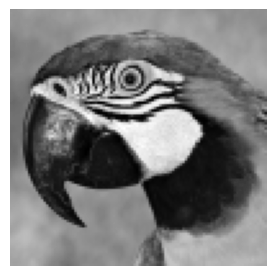

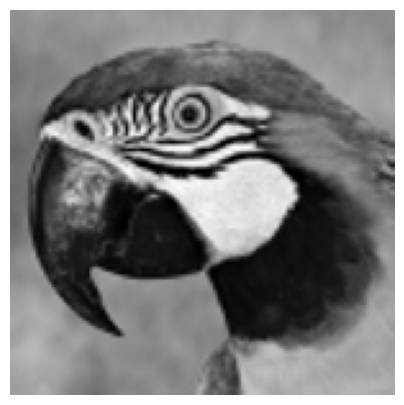

In [10]:
showImage(parrot)
showImage(parrotCI)